<a href="https://colab.research.google.com/github/HarshitGupta1511/AI_ChatBot_NLP/blob/master/Dmw_micro_hg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
# Simulated data for 1000 vehicles with coordinates and speed
np.random.seed(42)
data = {
    'latitude': np.random.uniform(25.0, 25.2, 1000),
    'longitude': np.random.uniform(78.0, 78.2, 1000),
    'speed': np.random.uniform(0, 80, 1000)  # km/h
}
df = pd.DataFrame(data)


In [3]:
# Using only location data for clustering
coords = df[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5)
df['zone'] = kmeans.fit_predict(coords)


In [4]:
zone_avg_speed = df.groupby('zone')['speed'].mean()
print("Average Speed per Zone:\n", zone_avg_speed)


Average Speed per Zone:
 zone
0    38.949491
1    40.929003
2    39.812952
3    41.030251
4    39.999732
Name: speed, dtype: float64


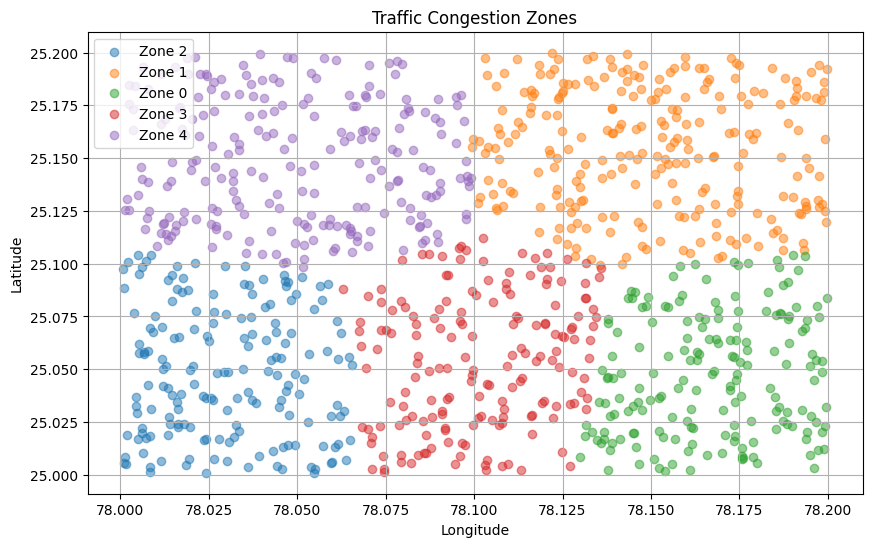

In [5]:
plt.figure(figsize=(10, 6))
for zone in df['zone'].unique():
    cluster = df[df['zone'] == zone]
    plt.scatter(cluster['longitude'], cluster['latitude'], label=f'Zone {zone}', alpha=0.5)
plt.title("Traffic Congestion Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()
